In [1]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 애플코딕 설치되어 있을때
plt.rcParams['font.family'] = 'AppleGothic'

---
## 서울시 생활인구

### 전처리 1 : 월별데이터 합치기

- 전처리 1 : 데이터수집 및 합치기
    - 2023.01 ~ 2023.03
    - 행정동 단위 데이터(내국인) : https://data.seoul.go.kr/dataList/OA-14991/S/1/datasetView.do#

In [2]:
#2023.01~2024.02 파일 불러오기
people_202301_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202301.csv')
people_202302_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202302.csv')
people_202303_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202303.csv')
people_202304_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202304.csv')
people_202305_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202305.csv')
people_202306_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202306.csv')
people_202307_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202307.csv')
people_202308_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202308.csv')
people_202309_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202309.csv')
people_202310_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202310.csv')
people_202311_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202311.csv')
people_202312_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202312.csv')
people_202401_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202401.csv')
people_202402_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/LOCAL_PEOPLE_DONG_202402.csv')

#데이터프레임 확인
display(people_202301_df.head(3))

#컬럼이 한칸씩 밀린 상태라서 조정해줌
def re_column(df) : 
    df = df.shift(1, axis = 1).drop(columns='기준일ID').reset_index().rename(columns={'index' : '기준일ID'})
    df['기준일ID'] = df['기준일ID'].astype(str)
    df['기준일ID'] = pd.to_datetime(df['기준일ID'])
    return df 

people_202301_df = re_column(people_202301_df)
people_202302_df = re_column(people_202302_df)
people_202303_df = re_column(people_202303_df)
people_202304_df = re_column(people_202304_df)
people_202305_df = re_column(people_202305_df)
people_202306_df = re_column(people_202306_df)
people_202307_df = re_column(people_202307_df)
people_202308_df = re_column(people_202308_df)
people_202309_df = re_column(people_202309_df)
people_202310_df = re_column(people_202310_df)
people_202311_df = re_column(people_202311_df)
people_202312_df = re_column(people_202312_df)
people_202401_df = re_column(people_202401_df)
people_202402_df = re_column(people_202402_df)


#데이터프레임 확인
print('컬럼조정 후')
display(people_202301_df.head(3))

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
20230101,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,1017.8879,...,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398,NaN
20230101,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,2452.3951,...,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468,NaN
20230101,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,859.3891,...,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534,NaN


컬럼조정 후


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2023-01-01,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,...,1427.6022,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398
1,2023-01-01,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,...,1358.7566,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468
2,2023-01-01,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,...,742.9488,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534


In [3]:
# 2024년 03은 파일이 달라서 별도로 불러오기
people_202403_df = pd.read_csv('/Users/sookyeong/Documents/내배캠/팀프로젝트/project5_final/(2~3월)행정동 단위 서울 생활인구(내국인).csv', encoding = 'cp949', parse_dates=['기준일ID'])
people_202403_df = people_202403_df[people_202403_df['기준일ID'].dt.month == 3]
people_202403_df.head(3)

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2024-03-27,0,11110515,14840.8831,549.1561,349.9232,530.2756,327.0264,422.4447,367.4800,...,466.9370,550.3783,615.8600,698.8575,813.4778,647.1391,617.5994,524.3623,317.6291,1092.1060
1,2024-03-27,0,11110530,12511.9138,230.5748,102.4779,206.5595,298.3025,430.3030,486.6721,...,426.8558,510.9462,712.4392,551.5134,732.0788,573.7340,478.8029,433.9911,314.8969,848.9820
2,2024-03-27,0,11110540,3757.1119,51.2484,39.2684,317.8925,335.1009,96.4261,125.2983,...,91.0278,108.1918,128.1927,164.9726,192.9392,123.3782,127.3750,117.8764,90.7879,277.2628


In [4]:
#월별 데이터 프레임 합치기
people_df = pd.concat([people_202301_df, people_202302_df, people_202303_df, people_202304_df,
                       people_202305_df, people_202306_df, people_202307_df,
                        people_202308_df, people_202309_df, people_202310_df, people_202311_df, people_202312_df,
                        people_202401_df, people_202402_df, people_202403_df],axis = 0).reset_index().drop(columns = 'index')

people_df.head(3) 

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2023-01-01,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,...,1427.6022,969.1248,699.4546,622.1475,625.7901,566.5720,599.1306,463.8273,502.3974,1147.4398
1,2023-01-01,0,11740515,53691.8435,2795.6587,1715.7807,1631.9745,1062.1799,1111.8742,1292.0350,...,1358.7566,1706.7832,2708.6022,2535.5879,2325.0571,1827.0084,1775.5145,1788.3482,1587.5070,3451.4468
2,2023-01-01,0,11650621,25383.1167,976.7546,642.5762,928.4712,611.1100,764.5014,750.0006,...,742.9488,843.2414,964.6389,1208.0918,1340.2070,1143.9092,987.3944,822.4728,630.8191,1746.0534


### 전처리 2 : 구, 동명 삽입

In [5]:
#행정동 코드로 행정동 이름 추가
#!pip install PublicDataReader
import PublicDataReader as pdr #행정동 코드 조회
hdong_df = pdr.code_hdong()

#시도코드 = 11(서울특별시)만 불러오기
hdong_df = hdong_df[hdong_df['시도코드'] == '11']
display(hdong_df.head(3))
print('hdong_df 행정동코드 변경전:', hdong_df['행정동코드'].dtypes) 

#행정동코드 타입변경, 앞 8자까지만 추출
hdong_df['행정동코드'] = hdong_df['행정동코드'].str[:8].astype('int')
display(hdong_df.head(3))
print('hdong_df 행정동코드 변경후:', hdong_df['행정동코드'].dtypes)

#행정동코드 기준으로 merge
people_df = pd.merge(people_df, hdong_df, on = '행정동코드')

#데이터프레임 확인
people_df.head(3)

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2024.2.1. 시행)


,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,생성일자,말소일자
0,11,서울특별시,11000,,1100000000,,19880423,
1,11,서울특별시,11110,종로구,1111000000,,19880423,
2,11,서울특별시,11110,종로구,1111051000,청운동,19880423,20081101


hdong_df 행정동코드 변경전: object


,시도코드,시도명,시군구코드,시군구명,행정동코드,읍면동명,생성일자,말소일자
0,11,서울특별시,11000,,11000000,,19880423,
1,11,서울특별시,11110,종로구,11110000,,19880423,
2,11,서울특별시,11110,종로구,11110510,청운동,19880423,20081101


hdong_df 행정동코드 변경후: int64


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,시도코드,시도명,시군구코드,시군구명,읍면동명,생성일자,말소일자
0,2023-01-01,0,11620655,20101.7019,238.5853,135.1789,505.8432,1067.5916,1851.6885,1306.1645,...,463.8273,502.3974,1147.4398,11,서울특별시,11620,관악구,신원동,20080901,
1,2023-01-01,1,11620655,19799.3460,244.6408,138.6100,446.4518,1045.7831,1833.8513,1264.0560,...,448.5198,514.7354,1145.1050,11,서울특별시,11620,관악구,신원동,20080901,
2,2023-01-01,2,11620655,20029.6992,200.6997,113.7135,427.7023,1042.3786,1820.6150,1307.7028,...,458.7113,515.5459,1136.2384,11,서울특별시,11620,관악구,신원동,20080901,


### 전처리3 : 연령 카테고리 변경
- 기존 5세 단위 -> 10 세단위

In [8]:
population_df = people_df.copy()

In [10]:
#people_df 성별 합치고 연령대 10세 단위로 묶기(미성년자는 날림)
population_df['0세~9세'] = population_df['남자0세부터9세생활인구수'] + population_df['여자0세부터9세생활인구수'] 
population_df['10세~19세'] = population_df['남자10세부터14세생활인구수'] + population_df['남자15세부터19세생활인구수'] + population_df['여자10세부터14세생활인구수'] + people_df['여자15세부터19세생활인구수'] 
population_df['20세~29세'] = population_df['남자20세부터24세생활인구수'] + population_df['남자25세부터29세생활인구수'] + population_df['여자20세부터24세생활인구수'] + people_df['여자25세부터29세생활인구수'] 
population_df['30세~39세'] = population_df['남자30세부터34세생활인구수'] + population_df['남자35세부터39세생활인구수'] + population_df['여자30세부터34세생활인구수'] + people_df['여자35세부터39세생활인구수'] 
population_df['40세~49세'] = population_df['남자40세부터44세생활인구수'] + population_df['남자45세부터49세생활인구수'] + population_df['여자40세부터44세생활인구수'] + people_df['여자45세부터49세생활인구수'] 
population_df['50세~59세'] = population_df['남자50세부터54세생활인구수'] + population_df['남자55세부터59세생활인구수'] + population_df['여자50세부터54세생활인구수'] + people_df['여자55세부터59세생활인구수'] 
population_df['60세~69세'] = population_df['남자60세부터64세생활인구수'] + population_df['남자65세부터69세생활인구수'] + population_df['여자60세부터64세생활인구수'] + people_df['여자65세부터69세생활인구수'] 
population_df['70세이상'] = population_df['남자70세이상생활인구수'] + population_df['여자70세이상생활인구수']

#필요없는 컬럼 삭제
population_df = population_df.drop(columns = ['남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수',
       '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수',
       '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수',
       '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수',
       '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수',
       '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수', '0세~9세', '10세~19세'])

#필요없는 컬럼 삭제
population_df = population_df.drop(columns = ['시도코드', '시도명', '시군구코드','생성일자', '말소일자'])

#기준일ID에서 년월 추출
population_df['기준년월'] = population_df['기준일ID'].dt.strftime('%Y-%m')

#데이터 확인
population_df.head(3) 


,기준일ID,시간대구분,행정동코드,총생활인구수,시군구명,읍면동명,20세~29세,30세~39세,40세~49세,50세~59세,60세~69세,70세이상,기준년월
0,2023-01-01,0,11620655,20101.7019,관악구,신원동,5657.6198,3992.6318,2724.5890,2354.1637,1709.8723,1936.1794,2023-01
1,2023-01-01,1,11620655,19799.3460,관악구,신원동,5591.9885,3978.0846,2633.9027,2347.3771,1687.2580,1929.6252,2023-01
2,2023-01-01,2,11620655,20029.6992,관악구,신원동,5630.9879,4097.1579,2729.0566,2378.0691,1690.8773,1945.8634,2023-01


### 전처리 4 : 이상치 확인

In [11]:
population_df.columns

Index(['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '시군구명', '읍면동명', '20세~29세',
       '30세~39세', '40세~49세', '50세~59세', '60세~69세', '70세이상', '기준년월'],
      dtype='object')

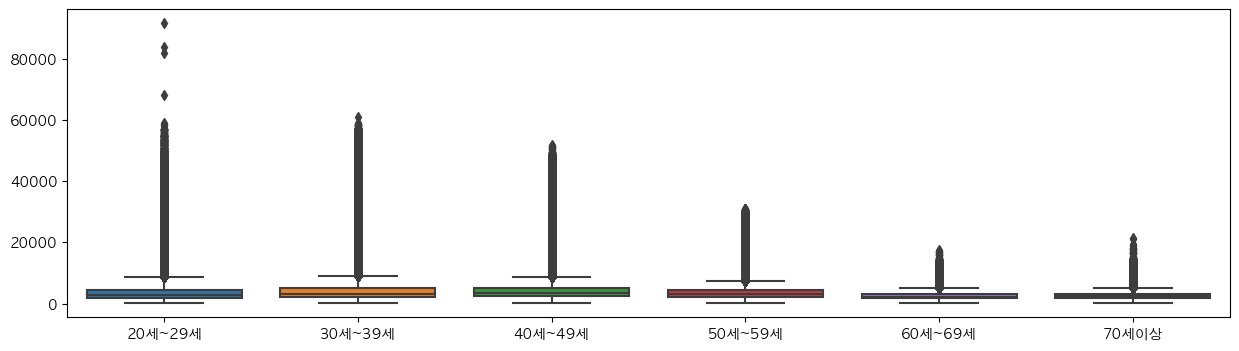

In [12]:
#연령 변수 설정 
population_age = population_df[['20세~29세', '30세~39세', '40세~49세', '50세~59세', '60세~69세', '70세이상']]

plt.figure(figsize = (15, 4))
sns.boxplot(population_age)
plt.show()


In [13]:
#20대 이상치 데이터 확인
display(population_df[population_df['20세~29세'] > 60000]) # --> 2023.10.07 여의도 불꽃축제로 인한 이상치

#이상치 제거 - 영등포구 여의동 20대 평균값으로 대체
yd_population = population_df[population_df['20세~29세'] < 60000][population_df['시군구명'] =='영등포구'][population_df['읍면동명'] == '여의동']
yd_population_mean = yd_population['20세~29세'].mean().round(4)

#이상치 대체
population_df.loc[population_df['20세~29세'] > 60000, '20세~29세'] = yd_population_mean

,기준일ID,시간대구분,행정동코드,총생활인구수,시군구명,읍면동명,20세~29세,30세~39세,40세~49세,50세~59세,60세~69세,70세이상,기준년월
1482041,2023-10-07,17,11560540,261566.2575,영등포구,여의동,68208.8915,44163.2691,33257.7035,21192.2273,11643.7374,9042.6797,2023-10
1482042,2023-10-07,18,11560540,315424.6990,영등포구,여의동,81791.4654,53716.6339,40882.1486,25529.6849,13790.0875,9833.9349,2023-10
1482043,2023-10-07,19,11560540,353256.2089,영등포구,여의동,91529.5253,60916.4227,46260.9484,28624.0337,15064.1004,10480.0212,2023-10
1482044,2023-10-07,20,11560540,323688.8260,영등포구,여의동,83692.0689,54838.9237,42029.4732,25824.0727,13293.4520,9647.1926,2023-10


/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_7354/1632276667.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  yd_population = population_df[population_df['20세~29세'] < 60000][population_df['시군구명'] =='영등포구'][population_df['읍면동명'] == '여의동']


In [14]:
#이상치 제거 확인
display(population_df[population_df['20세~29세'] > 60000])


,기준일ID,시간대구분,행정동코드,총생활인구수,시군구명,읍면동명,20세~29세,30세~39세,40세~49세,50세~59세,60세~69세,70세이상,기준년월


In [15]:
#전처리 파일 저장
population_df.to_csv('전처리_생활인구.csv', index = False)